analisis de datos

Grupo: 202016908_81

Tarea 4 algoritmos de aprendizaje no supervisado

Presentado por: Leidy Valentina Garcia Carrillo

Tutora:Sandra M. Patiño

Universidad Abierta y a Distancia- UNAD

Noviembre 2024

1.Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc

In [11]:
#Cargar las librerias 

In [13]:
import pandas as pd #Manejo y analisis de estructura de datos
import pandas as pd #Manejo y analisis de estructura de datos

In [15]:
import seaborn as sns #Creación de Graficos 
import matplotlib.pyplot as plt #para crear gráficos en dos dimensiones
import plotly.graph_objs as go #para crear gráficos en tres dimensiones
import plotly.express as px #creacion de gráficos en tres dimensiones

In [17]:
#librerias para implementar modelo hierarchical Clustering

In [19]:
from sklearn.cluster import AgglomerativeClustering #algoritmos de agrupamiento o clustering, para dividir datos en grupos
from sklearn.preprocessing import StandardScaler #escalar o normalizar datos
from scipy.cluster.hierarchy import linkage, dendrogram #herramientas para realizar agrupamientos jerárquco y visualización de dendrogramas

In [21]:
#librerias para evaluar el modelo

In [23]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [25]:
#libreria para evitar la perdida de memoria en windows

In [27]:
import warnings
warnings.filterwarnings('ignore')
#cargar el conjunto de datos en la variable data
data = pd.read_csv("Mall_Customers.csv")
data.head (20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [29]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [31]:
#obtener informacón sobre el tipo de dato y el total de valores en cada columna

In [33]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [35]:
#identificación de datos faltantes o atípicos

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

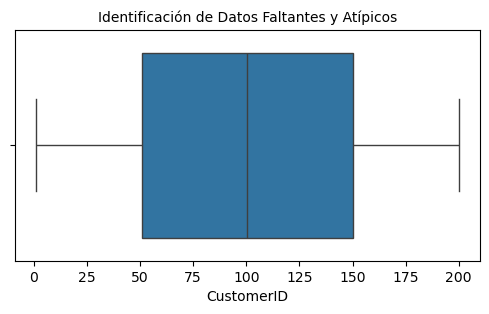

In [37]:
plt.figure(figsize=(6,3))
sns.boxplot(x=data['CustomerID'])#Recientes
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)


2.Preprocesar los datos limpiándolos, tratando valores faltantes y 
transformándolos según sea necesario.

Identificacion datos faltantes

In [45]:
#identificar columnas con datos faltantes 


In [47]:
print (data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [49]:
#identificación de datos atípicos

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

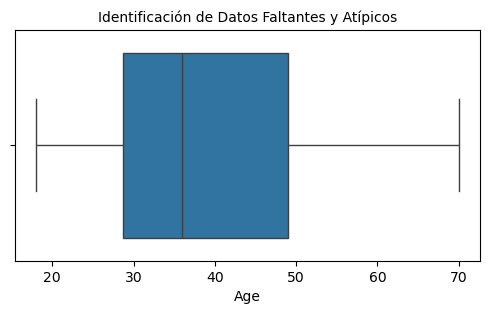

In [57]:
plt.figure(figsize=(6,3))
sns.boxplot(x=data['Age'])#Recientes
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)

In [59]:
#conteo de Datos Atípicos

In [61]:
nivel_minimo=0
nivel_maximo=10
Total_Atipicos=((data['CustomerID']<nivel_minimo)|(data['CustomerID']>nivel_maximo)).sum()
print("El total de datos atipico es {}".format(Total_Atipicos))

El total de datos atipico es 190


In [70]:
#filtrar Datos atipicos

In [79]:
Data=data[(data['CustomerID']<nivel_maximo)&(data['CustomerID']>nivel_minimo)]

In [92]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              9 non-null      int64 
 1   Gender                  9 non-null      object
 2   Age                     9 non-null      int64 
 3   Annual Income (k$)      9 non-null      int64 
 4   Spending Score (1-100)  9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 432.0+ bytes


3 seleccionar las caracteristica mas relevante para entrenar el modelo utilizando seleccion de caracteristicas

In [82]:
#Caracteristicas demograficas

In [175]:
Data1 = Data [["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]

In [177]:
#Revicion de los datos de las variables objetivo
Data1.head(40)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3


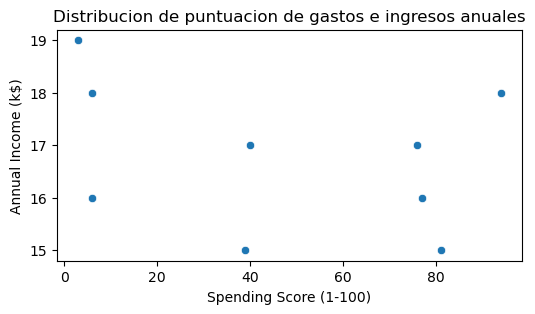

In [181]:
# Grafica antes del agrupamiento

plt.figure(figsize = (6,3))
sns.scatterplot(x=data['Spending Score (1-100)'],y=data['Annual Income (k$)'])
plt.title('Distribucion de puntuacion de gastos e ingresos anuales')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.show()

4 Entrenar el modelo configurando los diferentes parametros

In [173]:
print(Data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [185]:
print(Data.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [187]:
Data.columns = Data.columns.str.strip()

In [191]:
from sklearn.preprocessing import LabelEncoder
Data["Gender"] = LabelEncoder().fit_transform(Data["Gender"])

In [203]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Data[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]])

In [205]:
#evaluamos el scaled_data

In [217]:
linked = linkage(scaled_data, method='ward')

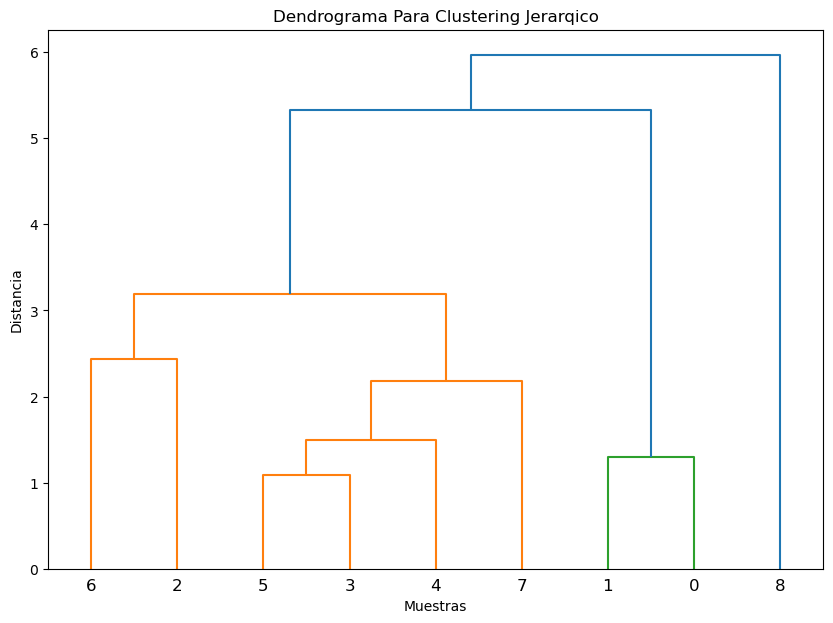

In [223]:
plt.figure(figsize=(10,7))
dendrogram(linked,orientation='top',distance_sort='descending',show_leaf_counts=False)
plt.title('Dendrograma Para Clustering Jerarqico')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

In [239]:
#entrenamiento del modelo de Clustering Jerarquico

In [241]:
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = model.fit_predict(scaled_data)

5. Evaluar el desempeño del modelo con métricas como 
Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc

In [245]:
#indice de calinski-harabasz

In [243]:
ch_score = calinski_harabasz_score(scaled_data, labels)
print(f"indice calinski-harabasz: {ch_score}")

indice calinski-harabasz: 7.379593476270256


6. Realizar las diferentes gráficas que permitan visualizar los 
resultados del modelo

Grafico de dispersion para visualización de clusters

In [253]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [255]:
#Aplicar el modelo de clustering jerarquico 

In [ ]:
model = AgglomerativeClustering(n_clusters=4)
Datos1['Cluster'] = model.fit_predict(scaled_data)
plt.figure(figsize=(8,6))
plt.scatter(Datos['Age'],Datos[